In [10]:
import pandas as pd
import altair as alt
# Load the dataset
file_path = "/Users/shanemoncayo/Downloads/superstore.csv"
df = pd.read_csv(file_path)


In [2]:
product_performance = df.groupby(["Product.Name"]).agg(
    total_quantity=("Quantity", "sum"),
    total_sales=("Sales", "sum"),
    total_profit=("Profit", "sum")
).sort_values(by="total_sales", ascending=False).reset_index()


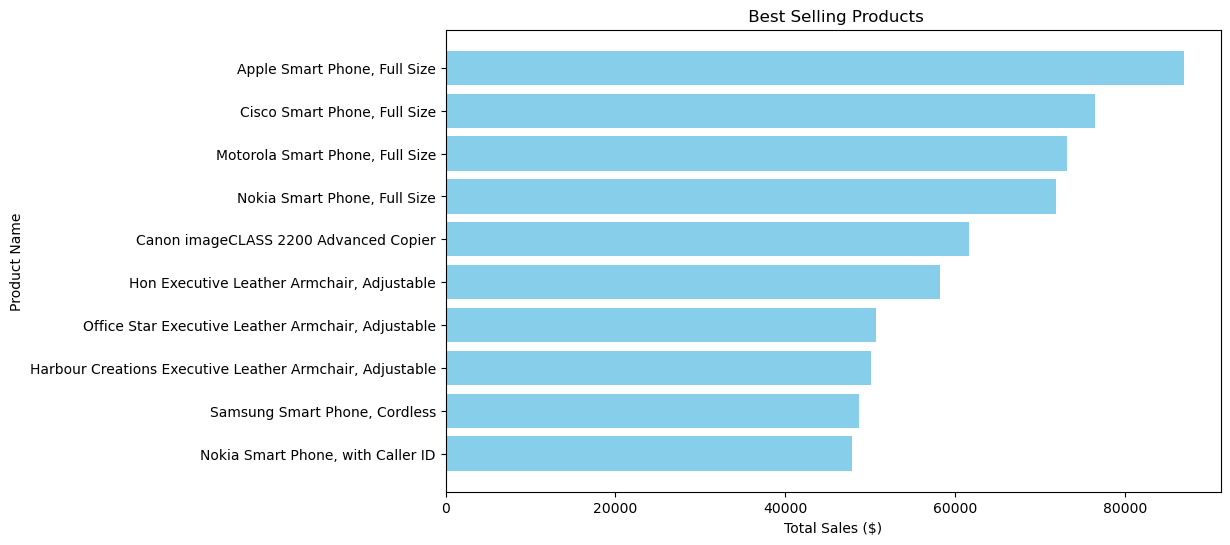

In [3]:
import matplotlib.pyplot as plt

# Select top 10 best-selling products
top_10_products = product_performance.head(10)

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_10_products["Product.Name"], top_10_products["total_sales"], color="skyblue")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title(" Best Selling Products")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Display the chart
plt.show()

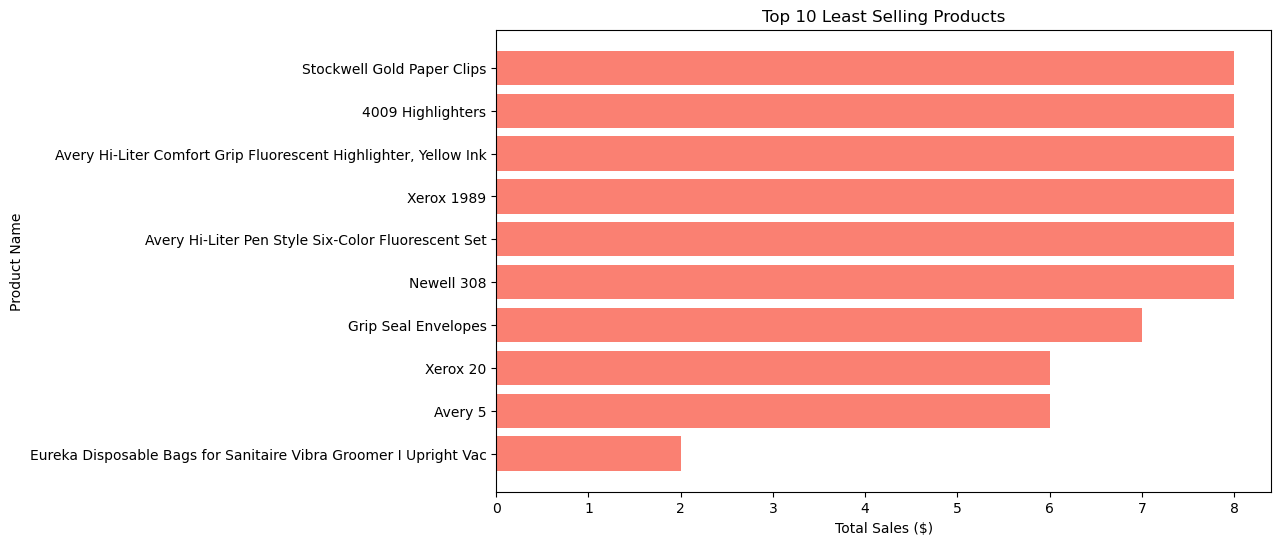

In [15]:
bottom_10_products = product_performance.tail(10)

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_products["Product.Name"], bottom_10_products["total_sales"], color="salmon")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 10 Least Selling Products")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Display the chart
plt.show()

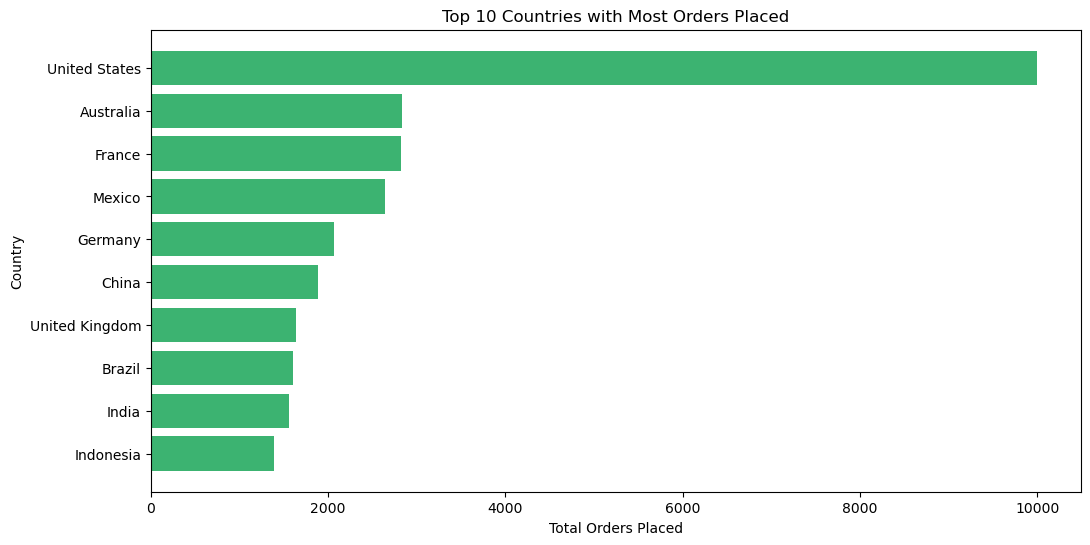

In [16]:
country_orders = df.groupby("Country").agg(
    total_orders=("Order.ID", "count")
).sort_values(by="total_orders", ascending=False).reset_index()

# Select the top 10 countries with the most orders placed
top_10_countries = country_orders.head(10)

# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(top_10_countries["Country"], top_10_countries["total_orders"], color="mediumseagreen")
plt.xlabel("Total Orders Placed")
plt.ylabel("Country")
plt.title("Top 10 Countries with Most Orders Placed")
plt.gca().invert_yaxis()  # Invert y-axis for better readability


In [4]:
import pandas as pd
import altair as alt
import json
import urllib

/var/folders/09/8n0jjzb96hj4ck1_q2jn196h0000gn/T/ipykernel_32021/2130432684.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


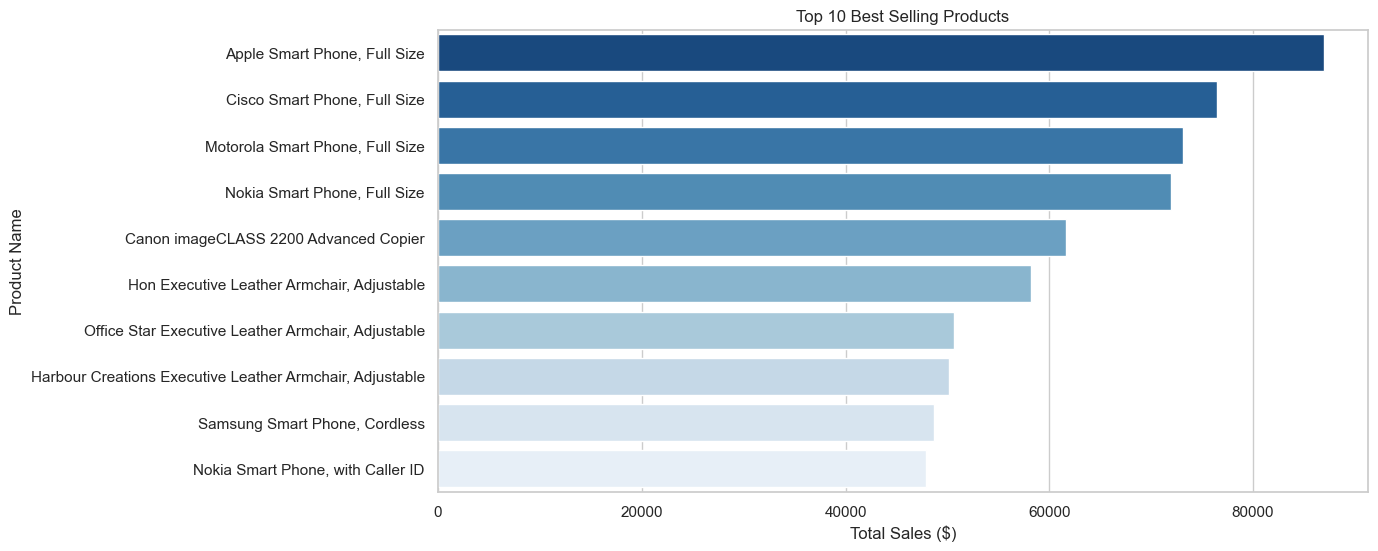

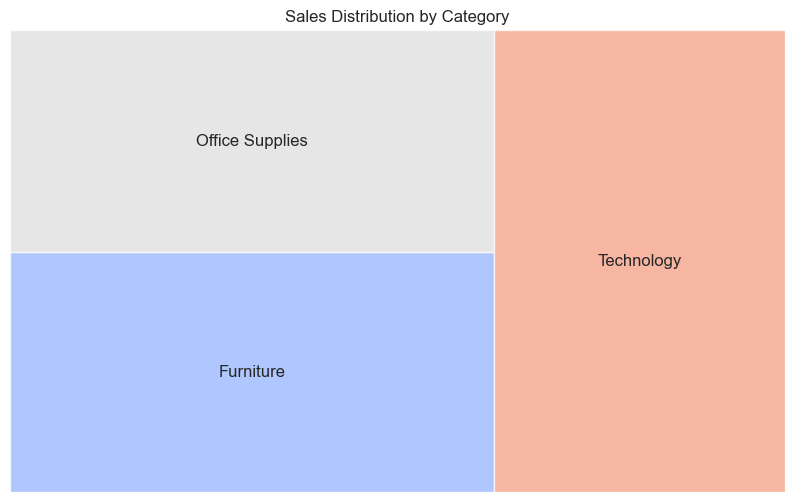

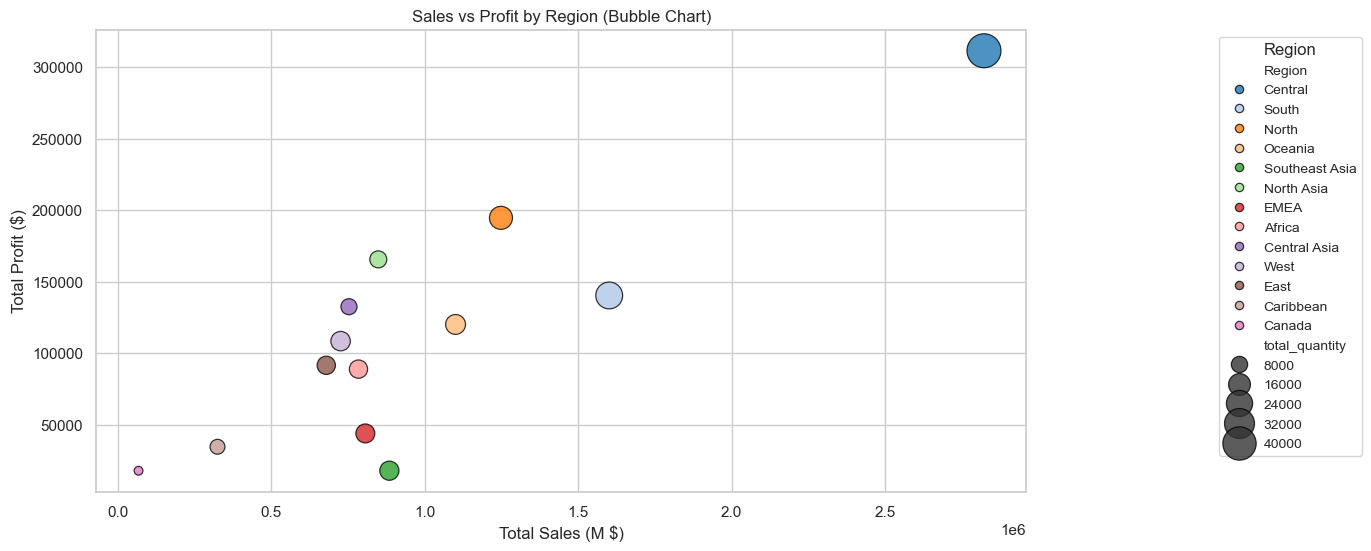

/var/folders/09/8n0jjzb96hj4ck1_q2jn196h0000gn/T/ipykernel_32021/2130432684.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


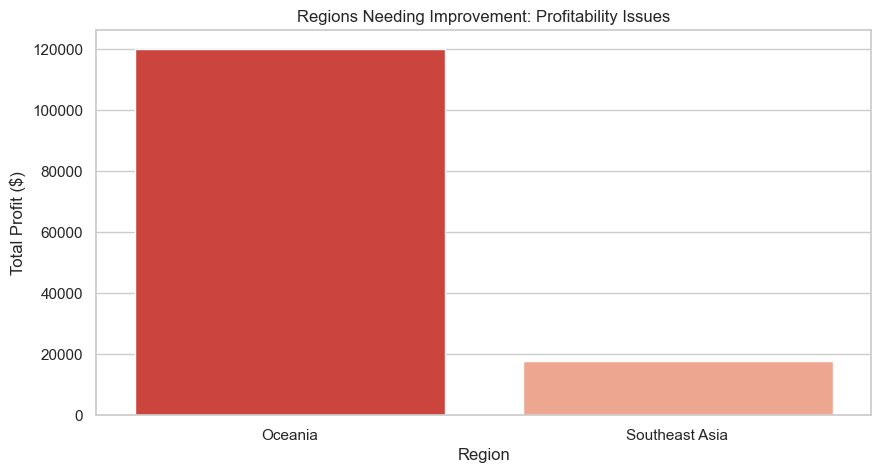

In [9]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()


# Create Regional Performance DataFrame
region_performance = df.groupby(["Region"]).agg(
    total_quantity=("Quantity", "sum"),
    total_sales=("Sales", "sum"),
    total_profit=("Profit", "sum")
).sort_values(by="total_sales", ascending=False).reset_index()

# Set visualization style
sns.set_theme(style="whitegrid")

# --- 1. Top Performing Products --- #
plt.figure(figsize=(12, 6))
sns.barplot(
    data=product_performance.head(10), 
    x="total_sales", 
    y="Product.Name", 
    palette="Blues_r"
)
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 10 Best Selling Products")
plt.show()

# --- 2. Treemap for Sales by Category --- #
category_sales = df.groupby("Category")["Sales"].sum().reset_index()
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=category_sales["Sales"], 
    label=category_sales["Category"], 
    alpha=0.7, 
    color=sns.color_palette("coolwarm", len(category_sales))
)
plt.title("Sales Distribution by Category")
plt.axis("off")
plt.show()

# --- 3. Sales vs Profit by Region (Bubble Chart) --- #
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=region_performance, 
    x="total_sales", 
    y="total_profit", 
    size="total_quantity", 
    hue="Region", 
    sizes=(40, 600),  # Increase bubble size for better visibility
    palette="tab20",  # Use a more distinct color palette for better differentiation
    edgecolor="black",
    alpha=0.8
)

# Customize the legend to ensure all regions are visible and readable
plt.xlabel("Total Sales (M $)")
plt.ylabel("Total Profit ($)")
plt.title("Sales vs Profit by Region (Bubble Chart)")

# Adjust the legend for better readability and ensure all regions fit
plt.legend(title="Region", bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=10, title_fontsize=12, frameon=True)

# Display the chart
plt.show()
# --- 4. Regions Needing Improvement (Bar Chart) --- #
regions_needing_improvement = region_performance[region_performance["Region"].isin(["Southeast Asia", "Oceania"])]
plt.figure(figsize=(10, 5))
sns.barplot(
    data=regions_needing_improvement, 
    x="Region", 
    y="total_profit", 
    palette="Reds_r"
)
plt.xlabel("Region")
plt.ylabel("Total Profit ($)")
plt.title("Regions Needing Improvement: Profitability Issues")
plt.show()
